In [6]:
import pandas as pd

import numpy as np

from sklearn.datasets import load_iris

data = load_iris()

In [7]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['Species'] = data.target

#replace this with the actual names

target = np.unique(data.target)

target_names = np.unique(data.target_names)

targets = dict(zip(target, target_names))

df['Species'] = df['Species'].replace(targets)

In [11]:
x = df.drop(columns="Species")

y = df["Species"]

In [12]:
feature_names = x.columns
labels = y.unique()

In [13]:
from sklearn.model_selection import train_test_split

X_train, test_x, y_train, test_lab = train_test_split(x,y,test_size = 0.4,random_state = 42)

In [27]:
 from sklearn.tree import DecisionTreeClassifier
 clf = DecisionTreeClassifier(max_depth =4, random_state = 42)

In [28]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [29]:
test_pred = clf.predict(test_x)

In [30]:
from sklearn import metrics

import seaborn as sns

import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(test_lab,test_pred)

In [31]:
confusion_matrix

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 17]], dtype=int64)

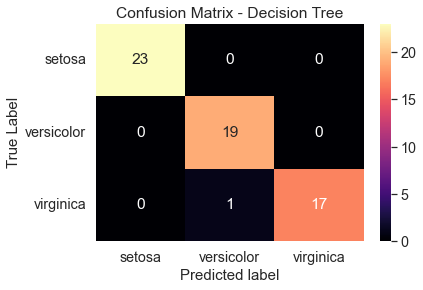

<Figure size 720x504 with 0 Axes>

In [32]:
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [33]:
clf.score(test_x,test_lab)

0.9833333333333333

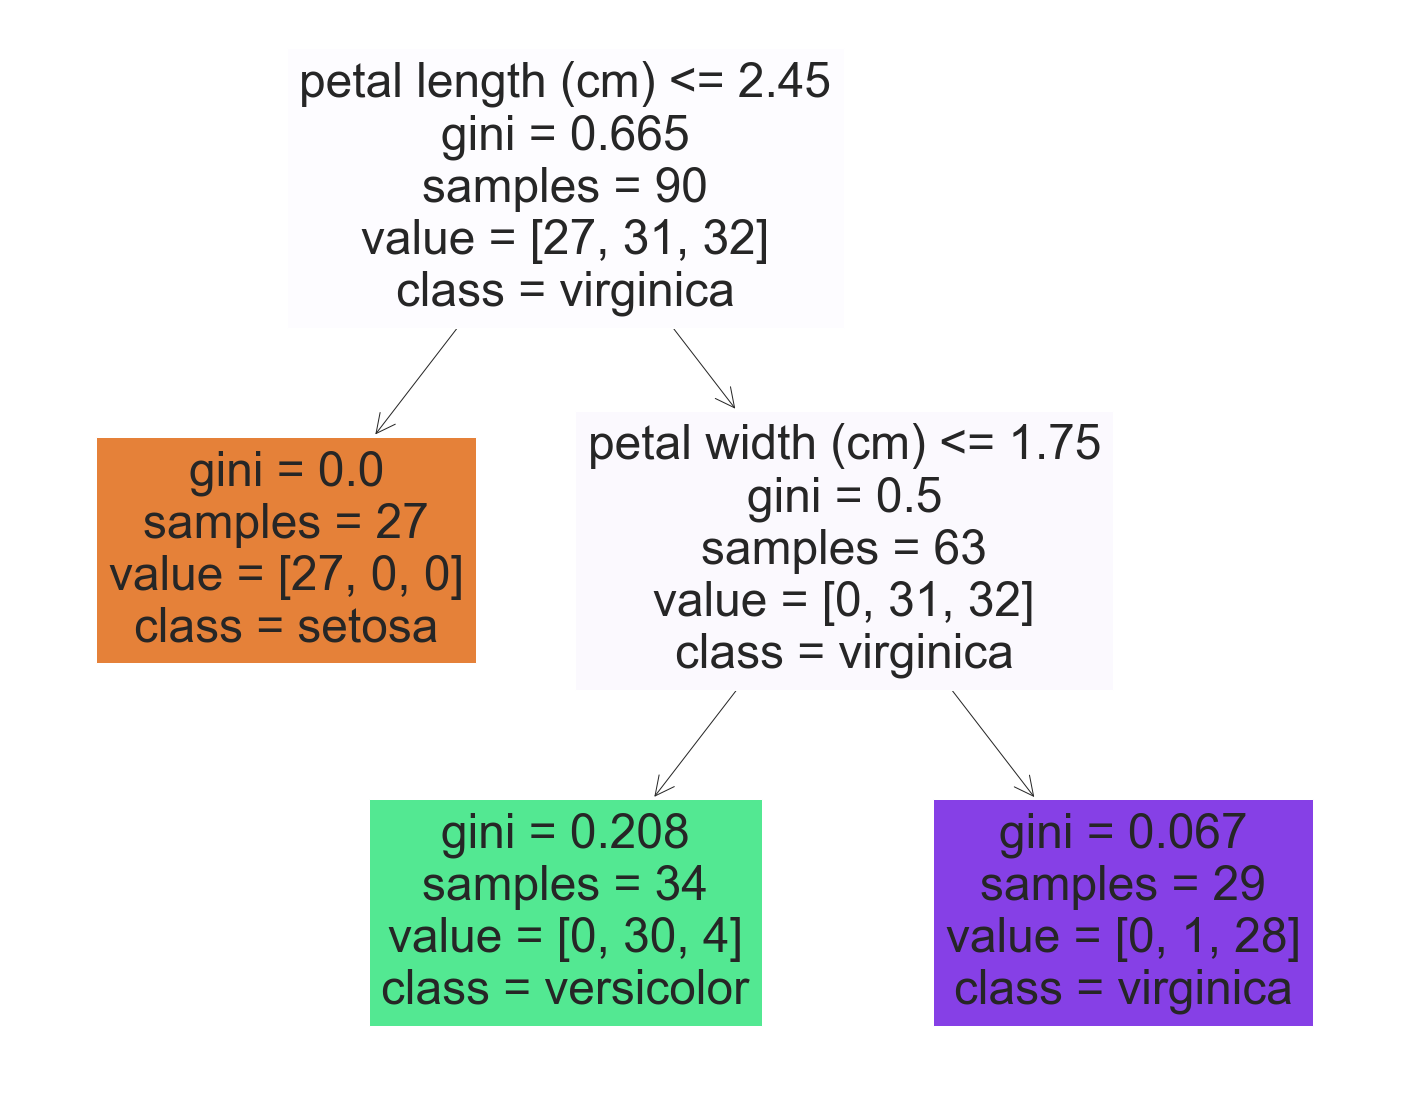

In [26]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=data.feature_names,  
                   class_names=data.target_names,
                   filled=True)